<center>
<h1>Introduction to Jet Images and Computer Vision</h1>
<h3>Michela Paganini - Yale University</h3>
<h4>High Energy Phenomenology, Experiment and Cosmology Seminar Series</h4>
<img src='http://www.edustart.org/wp-content/uploads/2014/03/MIST-Vert-Aggie-Maroon-page-001-300x200.jpg'>
</center>


* What is a jet image?
* Uniqueness wrt to natural images
* Jet image classification papers
* Regression tasks?
* Generation
* Towards deep learning-based calorimetry

Material:
 1. Ben Nachman's plenary talk at ACAT 2017 (<a href="https://indico.cern.ch/event/567550/contributions/2656471/attachments/1510207/2354761/Nachman_ACAT.pdf">slides</a>)
 1. My talk on Generative Adversarial Networks for jet images at the 2017 IML Workshop (<a href="http://cds.cern.ch/record/2256878?ln=en">video</a>)
 1. Jannicke Pearkes's talk on boosted top tagging with jet images at the 2017 IML Workshop (<a href="http://cds.cern.ch/record/2256876?ln=en">video</a>)
 1. Michael Kagan's overview talk at LHCP 2017 (<a href="https://cds.cern.ch/record/2267879?ln=en">slides</a>)
 1. ATLAS PUB Note on quark vs gluon tagging with jet images(<a href="https://cds.cern.ch/record/2275641/files/ATL-PHYS-PUB-2017-017.pdf">note</a>)
 1. Lynn Huynh's summer report on jet image pre-processing (<a href="https://cds.cern.ch/record/2209127/files/Lynn_Huynh_Report.pdf">write-up</a>)
 1. Ben Nachman's talk at DataScience@LHC 2015 (<a href="http://cds.cern.ch/record/2069153">video</a>)

# Dataset

[![DOI](https://zenodo.org/badge/DOI/10.17632/4r4v785rgx.1.svg)](https://doi.org/10.17632/4r4v785rgx.1)

<a href="https://zenodo.org/record/269622#.WgZFPRNSyRs"><img src="images/zenodo.jpg"></a>

Although the dataset was released in conjunction with the arXiv publication of our [work on Generative Adversarial Networks for jet images](https://arxiv.org/pdf/1701.05927.pdf), it was previously used in the original "[Jet Images -- Deep Learning Edition](https://link.springer.com/article/10.1007%2FJHEP07%282016%29069)" work on jet image classification. Feel free to explore the dataset and use it for any project you have in mind (please cite the dataset and relevant publications explaining its generation!)

### Download dataset from Zenodo

In [5]:
import os
from keras.utils.data_utils import get_file

# Info for downloading the dataset from Zenodo
MD5_HASH = 'f9b11c46b6a0ff928bec2eccf865ecf0'
DATAFILE = 'jet-images_Mass60-100_pT250-300_R1.25_Pix25.hdf5'
URL_TEMPLATE = 'https://zenodo.org/record/{record}/files/{filename}'

print('[INFO] MD5 verification: {}'.format(MD5_HASH))

datafile = get_file(
    fname=DATAFILE,
    origin=URL_TEMPLATE.format(record=269622, filename=DATAFILE),
    md5_hash=MD5_HASH
)

Using TensorFlow backend.


[INFO] MD5 verification: f9b11c46b6a0ff928bec2eccf865ecf0
2220081152/2220068544 [==============================] - 254s 0us/step


# Jets at the LHC

<img src="http://cms.web.cern.ch/sites/cms.web.cern.ch/files/styles/large/public/field/image/jets_v1.png?itok=ULcYw1lS">

Jets are the observable result of quarks and gluons scattering at high energy. A collimated stream of
protons and other hadrons forms in the direction of the initiating quark or gluon. Clusters of such
particles are called jets.

# Jet Images

Mature field of research! (image courtesy of B.P.Nachman) 
<img src="./images/graph.jpg" width="800">
<a href="https://arxiv.org/abs/1709.04464"><img src="./images/jet.jpg" width="600" align="right" style="border:5px solid black"></a>


### What is a jet image?

<img src="./images/jet_image.jpg" width="300">

> A jet image is a two-dimensional representation of the radiation pattern within a jet: the distribution of the locations and energies of the jet’s constituent particles. The jet image consists of a regular grid of pixels in η×φ. 

Advantages of this data format include: easy visual inspection, fixed-length representation, suitable for application of computer vision techniques.

### Pre-processing

In the dataset we will be using today:

> The finite granularity of a calorimeter is simulated with a regular 0.1×0.1 grid in η and φ. The energy of each calorimeter cell is given by the sum of the energies of all particles incident on the cell. Cells with positive energy are assigned to jets using the anti-kt clustering algorithm with a radius parameter of R = 1.0 via the software package FastJet 3.2.1.

> To mitigate the contribution from the underlying event, jets are are trimmed by re-clustering the constituents into R = 0.3 kt subjets and dropping those which have less than 5% of the transverse momentum of the parent jet. Trimming also reduces the impact of pileup: multiple proton-proton collisions occurring in the same event as the hard-scatter process. Jet images are formed by translating the η and φ of all constituents of a given jet so that its highest pT subjet is centered at the origin.

> A rectangular grid of η × φ ∈ [−1.25, 1.25] × [−1.25, 1.25] with 0.1 × 0.1 pixels centered at the origin
forms the basis of the jet image. The intensity of each pixel is the pT corresponding to the energy
and pseudorapditiy of the constituent calorimeter cell, pT = E_cell/ cosh(η_cell). The radiation pattern
is symmetric about the origin of the jet image and so the images are rotated. The subjet with the
second highest pT (or, in its absence, the direction of the first principle component) is placed at an
angle of −π/2 with respect to the η − φ axes. Finally, a parity transform about the vertical axis is
applied if the left side of the image has more energy than the right side.

<div align="right">
  <i>Learning Particle Physics by Example: Location-Aware Generative Adversarial Networks for Physics Synthesis</i> <br>
  [arXiv:1701.05927](https://arxiv.org/pdf/1701.05927.pdf)
</div>

References: 
* Section 3 of [arXiv:1511.05190](https://link.springer.com/content/pdf/10.1007%2FJHEP07%282016%29069.pdf)
* <a href="https://link.springer.com/article/10.1007/s41781-017-0004-6#Sec16">Appendix B</a> of [arXiv:1701.05927](https://arxiv.org/pdf/1701.05927.pdf)

### Uniqueness with respect to natural images in ML literature

# Hands-on tutorial

In [6]:
import h5py
import numpy as np
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm, Normalize
%matplotlib inline

In [7]:
# number of images to load
nb_points = 150000

In [8]:
# open hdf5 data file
d = h5py.File(datafile, 'r')

In [27]:
# content of the dataset
d.items()

[(u'image', <HDF5 dataset "image": shape (872666, 25, 25), type "<f4">),
 (u'jet_delta_R', <HDF5 dataset "jet_delta_R": shape (872666,), type "<f4">),
 (u'jet_eta', <HDF5 dataset "jet_eta": shape (872666,), type "<f4">),
 (u'jet_mass', <HDF5 dataset "jet_mass": shape (872666,), type "<f4">),
 (u'jet_phi', <HDF5 dataset "jet_phi": shape (872666,), type "<f4">),
 (u'jet_pt', <HDF5 dataset "jet_pt": shape (872666,), type "<f4">),
 (u'signal', <HDF5 dataset "signal": shape (872666,), type "<f4">),
 (u'tau_1', <HDF5 dataset "tau_1": shape (872666,), type "<f4">),
 (u'tau_2', <HDF5 dataset "tau_2": shape (872666,), type "<f4">),
 (u'tau_21', <HDF5 dataset "tau_21": shape (872666,), type "<f4">),
 (u'tau_3', <HDF5 dataset "tau_3": shape (872666,), type "<f4">),
 (u'tau_32', <HDF5 dataset "tau_32": shape (872666,), type "<f4">)]

In [29]:
# extract a random subset of samples
ix = range(d['image'].shape[0])
np.random.shuffle(ix)
ix = ix[:nb_points]

images, labels = d['image'][:][ix], d['signal'][:][ix]
mass = d['jet_mass'][:][ix]
delta_R = d['jet_delta_R'][:][ix]
tau_21 = d['tau_21'][:][ix]

In [30]:
def plot_jet_image(content, output_fname=None, vmin=1e-6, vmax=300, title=''):
    '''
    Function to help you visualize a jet image on a log scale
    Args:
    -----
        content : numpy array of dimensions 25x25, first arg to imshow, 
            content of the image
            e.g.: images.mean(axis=0) --> the average image

        output_fname : string, name of the output file where the plot will be 
            saved. 

        vmin : (default = 1e-6) float, lower bound of the pixel intensity 
            scale before saturation

        vmax : (default = 300) float, upper bound of the pixel intensity 
            scale before saturation

        title : (default = '') string, title of the plot, to be displayed 
            on top of the image
    '''
    fig, ax = plt.subplots(figsize=(7, 6))
    extent = [-1.25, 1.25, -1.25, 1.25]

    im = ax.imshow(content, interpolation='nearest',
                   norm=LogNorm(vmin=vmin, vmax=vmax), extent=extent)

    cbar = plt.colorbar(im, fraction=0.05, pad=0.05)
    cbar.set_label(r'Pixel $p_T$ (GeV)', y=0.85)
    plt.xlabel(r'[Transformed] Pseudorapidity $(\eta)$')
    plt.ylabel(r'[Transformed] Azimuthal Angle $(\phi)$')
    plt.title(title)

    if output_fname is None:
        plt.savefig(output_fname)

In [31]:
def plot_diff_jet_image(content, output_fname=None, extr=None, title='',
                        cmap=matplotlib.cm.seismic):
    '''
    Function to help you visualize the difference between two sets of jet 
        images on a linear scale
    Args:
    -----
        content : numpy array of dimensions 25x25, first arg to imshow, 
            content of the image
            e.g.: sig_images.mean(axis=0) - bkg_images.mean(axis=0)
        output_fname : string, name of the output file where the plot will be 
            saved.
        extr : (default = None) float, magnitude of the upper and lower 
            bounds of the pixel intensity scale before saturation (symmetric 
            around 0)
        title : (default = '') string, title of the plot, to be displayed on 
            top of the image
        cmap : (default = matplotlib.cm.PRGn_r) matplotlib colormap, ideally 
            white in the middle
    '''
    fig, ax = plt.subplots(figsize=(6, 6))
    extent = [-1.25, 1.25, -1.25, 1.25]
    if extr == None:
        extr = max(abs(content.min()), abs(content.max()))
    im = ax.imshow(
        content,
        interpolation='nearest',
        norm=Normalize(vmin=-extr, vmax=+extr), extent=extent,
        cmap=cmap
    )

    plt.colorbar(im, fraction=0.05, pad=0.05)
    plt.xlabel(r'[Transformed] Pseudorapidity $(\eta)$')
    plt.ylabel(r'[Transformed] Azimuthal Angle $(\phi)$')
    plt.title(title)

    if output_fname:
        plt.savefig(output_fname)


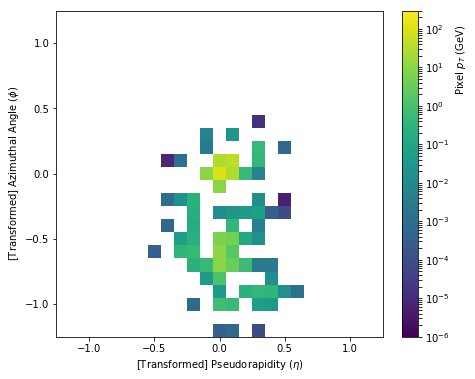

In [33]:
# visualize a jet image
plot_jet_image(images[0])

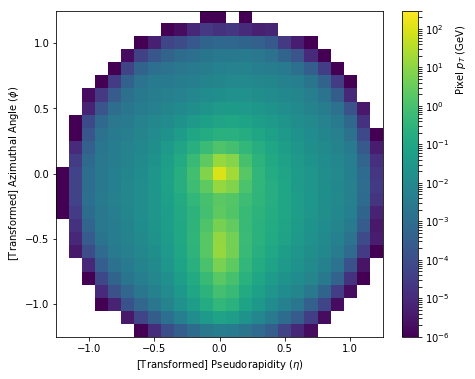

In [34]:
# visualize the average jet image
plot_jet_image(images.mean(axis=0))

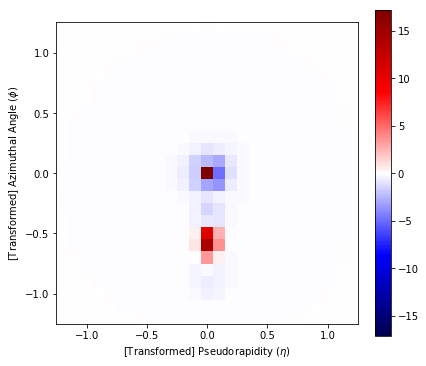

In [13]:
# visualize the difference between the average signal and the average background image
plot_diff_jet_image(
    images[labels == 1].mean(axis=0) - images[labels == 0].mean(axis=0)
)

## Looking at Physics features

In [14]:
def plot_physics_feature(feature_name, feature, labels, bins=None, output_fname=None):

    # if bins are not defined when function is called, define them here
    if not bins:
        bins = np.linspace(feature.min(), feature.max(), 50)

    fig, ax = plt.subplots(figsize=(6, 6))

    _ = plt.hist(feature[labels == 1], bins=bins, histtype='step',
                 label=r"Signal ($W' \rightarrow WZ$)",
                 normed=True, color='red')

    _ = plt.hist(feature[labels == 0], bins=bins, histtype='step',
                 label=r'Background (QCD dijets)', normed=True, color='blue')

    plt.xlabel(r'Discretized {} of Jet Image'.format(feature_name))
    plt.ylabel(r'Units normalized to unit area')
    plt.legend()

    if output_fname:
        plt.savefig(output_fname)


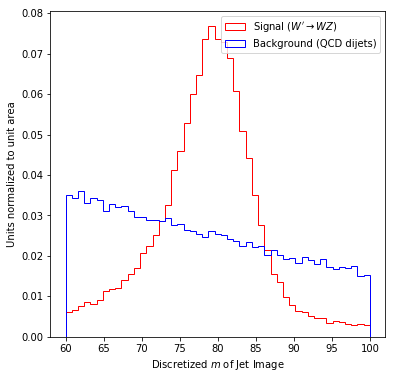

In [15]:
plot_physics_feature(r'$m$', mass, labels)

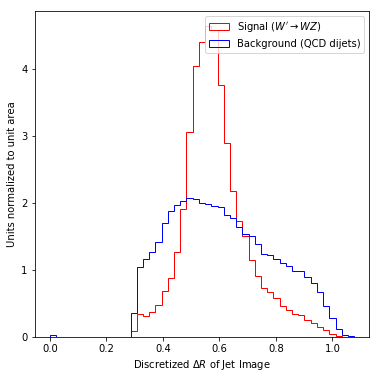

In [16]:
plot_physics_feature(r'$\Delta R$', delta_R, labels)

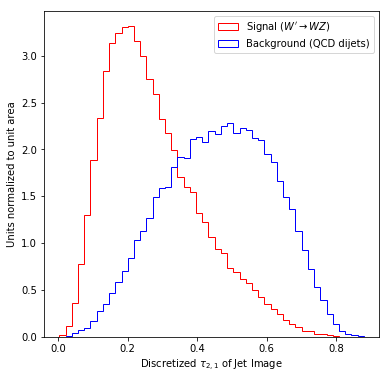

In [17]:
plot_physics_feature(r'$\tau_{2,1}$', tau_21, labels)

## Simple physics-based classifier

#### Data processing

In [46]:
features = np.stack((mass, tau_21, delta_R)).T

In [47]:
features

array([[ 67.35157013,   0.41938862,   0.6562472 ],
       [ 91.26261902,   0.51809722,   0.71427381],
       [ 60.32971573,   0.30596966,   0.36572069],
       ..., 
       [ 70.90836334,   0.530635  ,   0.44421422],
       [ 89.50447083,   0.51680565,   0.51566029],
       [ 65.52681732,   0.51121837,   0.40926456]], dtype=float32)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
# 80% train+validate, 20% test
images_train, images_test, \
    labels_train, labels_test, \
    features_train, features_test \
    = train_test_split(images, labels, features,
                       test_size=0.2)

# 64% train, 16% validate
images_train, images_val, \
    labels_train, labels_val, \
    features_train, features_val \
    = train_test_split(images_train, labels_train, features_train,
                       test_size=0.2)

In [50]:
print ('{} training samples\n{} validation samples\n{} testing samples'
       .format(images_train.shape[0], images_val.shape[0], images_test.shape[0]))

96000 training samples
24000 validation samples
30000 testing samples


In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_val = scaler.transform(features_val)
features_test = scaler.transform(features_test)

#### Model

In [112]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [119]:
x = Input(shape=(features_train.shape[1], ))
h = Dense(32, activation='relu')(x)
h = Dropout(0.3)(h)
h = Dense(32, activation='relu')(h)
h = Dropout(0.3)(h)
h = Dense(32, activation='relu')(h)
h = Dropout(0.3)(h)
y = Dense(1, activation='sigmoid')(h)

In [120]:
baseline_model = Model(x, y)
baseline_model.compile('adam', 'binary_crossentropy', metrics=['acc'])

In [121]:
baseline_model.fit(
    features_train, labels_train,
    epochs=200,
    batch_size=512,
    validation_data=(features_val, labels_val),
    callbacks=[
        EarlyStopping(verbose=True, patience=100, monitor='val_loss'),
        ModelCheckpoint('./models/baseline-model.h5', monitor='val_loss',
                        verbose=True, save_best_only=True)
    ]
)

Train on 96000 samples, validate on 24000 samples
Epoch 1/200
96000/96000 [==============================] - 2s 16us/step - loss: 0.5304 - acc: 0.7481 - val_loss: 0.4627 - val_acc: 0.7850
Epoch 2/200
96000/96000 [==============================] - 1s 12us/step - loss: 0.4806 - acc: 0.7810 - val_loss: 0.4596 - val_acc: 0.7862
Epoch 3/200
96000/96000 [==============================] - 1s 11us/step - loss: 0.4746 - acc: 0.7850 - val_loss: 0.4600 - val_acc: 0.7881
Epoch 4/200
96000/96000 [==============================] - 1s 11us/step - loss: 0.4723 - acc: 0.7856 - val_loss: 0.4613 - val_acc: 0.7901
Epoch 5/200
96000/96000 [==============================] - 1s 11us/step - loss: 0.4697 - acc: 0.7871 - val_loss: 0.4594 - val_acc: 0.7901
Epoch 6/200
96000/96000 [==============================] - 1s 11us/step - loss: 0.4691 - acc: 0.7870 - val_loss: 0.4601 - val_acc: 0.7899
Epoch 7/200
96000/96000 [==============================] - 1s 11us/step - loss: 0.4668 - acc: 0.7875 - val_loss: 0.4576 - 

96000/96000 [==============================] - 1s 11us/step - loss: 0.4618 - acc: 0.7892 - val_loss: 0.4604 - val_acc: 0.7900
Epoch 32/200
96000/96000 [==============================] - 1s 11us/step - loss: 0.4623 - acc: 0.7894 - val_loss: 0.4614 - val_acc: 0.7898
Epoch 33/200
96000/96000 [==============================] - 1s 11us/step - loss: 0.4613 - acc: 0.7903 - val_loss: 0.4598 - val_acc: 0.7899
Epoch 34/200
96000/96000 [==============================] - 1s 11us/step - loss: 0.4610 - acc: 0.7898 - val_loss: 0.4613 - val_acc: 0.7895
Epoch 35/200
96000/96000 [==============================] - 1s 11us/step - loss: 0.4616 - acc: 0.7898 - val_loss: 0.4602 - val_acc: 0.7897
Epoch 36/200
96000/96000 [==============================] - 1s 11us/step - loss: 0.4611 - acc: 0.7891 - val_loss: 0.4610 - val_acc: 0.7896
Epoch 37/200
96000/96000 [==============================] - 1s 11us/step - loss: 0.4609 - acc: 0.7906 - val_loss: 0.4612 - val_acc: 0.7900
Epoch 38/200
96000/96000 [==============

Epoch 63/200
96000/96000 [==============================] - 1s 11us/step - loss: 0.4591 - acc: 0.7905 - val_loss: 0.4614 - val_acc: 0.7911
Epoch 64/200
96000/96000 [==============================] - 1s 11us/step - loss: 0.4600 - acc: 0.7894 - val_loss: 0.4621 - val_acc: 0.7909
Epoch 65/200
96000/96000 [==============================] - 1s 11us/step - loss: 0.4600 - acc: 0.7901 - val_loss: 0.4620 - val_acc: 0.7910
Epoch 66/200
96000/96000 [==============================] - 1s 11us/step - loss: 0.4604 - acc: 0.7912 - val_loss: 0.4636 - val_acc: 0.7917
Epoch 67/200
96000/96000 [==============================] - 1s 11us/step - loss: 0.4610 - acc: 0.7900 - val_loss: 0.4632 - val_acc: 0.7911
Epoch 68/200
96000/96000 [==============================] - 1s 11us/step - loss: 0.4601 - acc: 0.7909 - val_loss: 0.4619 - val_acc: 0.7902
Epoch 69/200
96000/96000 [==============================] - 1s 11us/step - loss: 0.4599 - acc: 0.7905 - val_loss: 0.4622 - val_acc: 0.7901
Epoch 70/200
96000/96000 [=

Epoch 95/200
96000/96000 [==============================] - 1s 11us/step - loss: 0.4590 - acc: 0.7907 - val_loss: 0.4654 - val_acc: 0.7895
Epoch 96/200
96000/96000 [==============================] - 1s 11us/step - loss: 0.4594 - acc: 0.7914 - val_loss: 0.4657 - val_acc: 0.7896
Epoch 97/200
96000/96000 [==============================] - 1s 11us/step - loss: 0.4595 - acc: 0.7901 - val_loss: 0.4660 - val_acc: 0.7890
Epoch 98/200
96000/96000 [==============================] - 1s 11us/step - loss: 0.4587 - acc: 0.7912 - val_loss: 0.4619 - val_acc: 0.7904
Epoch 99/200
96000/96000 [==============================] - 1s 11us/step - loss: 0.4596 - acc: 0.7906 - val_loss: 0.4630 - val_acc: 0.7894
Epoch 100/200
96000/96000 [==============================] - 1s 11us/step - loss: 0.4590 - acc: 0.7910 - val_loss: 0.4625 - val_acc: 0.7906
Epoch 101/200
96000/96000 [==============================] - 1s 11us/step - loss: 0.4591 - acc: 0.7907 - val_loss: 0.4644 - val_acc: 0.7888
Epoch 102/200
96000/96000

Keras saves the entire training history, keeping track of whatever metric you specify (here accuracy and loss).

In [122]:
history = baseline_model.history.history
history.keys()

['acc', 'loss', 'val_acc', 'val_loss']

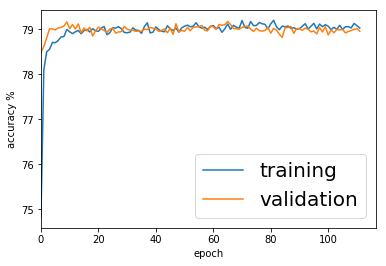

In [123]:
# accuracy plot
plt.plot(100 * np.array(history['acc']), label='training')
plt.plot(100 * np.array(history['val_acc']), label='validation')
plt.xlim(0)
plt.xlabel('epoch')
plt.ylabel('accuracy %')
plt.legend(loc='lower right', fontsize=20)
plt.show()

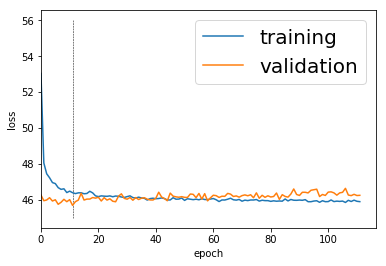

In [124]:
# loss plot
plt.plot(100 * np.array(history['loss']), label='training')
plt.plot(100 * np.array(history['val_loss']), label='validation')
plt.xlim(0)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right', fontsize=20)
# the line indicate the epoch corresponding to the best performance on the validation set
plt.vlines(np.argmin(history['val_loss']), 45, 56, linestyle='dashed', linewidth=0.5)
plt.show()

In [154]:
print 'Loss estimate on unseen examples (from validation set) = {0:.3f}'.format(np.min(history['val_loss']))

Loss estimate on unseen examples (from validation set) = 0.457


#### Evaluate on test set

In [213]:
baseline_modeline_model.load_weights('./models/baseline-model.h5')

In [214]:
yhat_baseline = baseline_model.predict(features_test, batch_size=512)

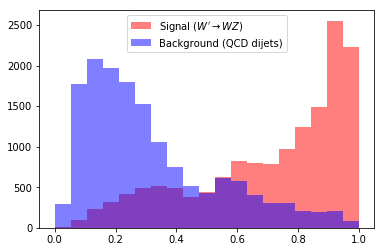

In [215]:
bins = np.linspace(0, 1, 20)
_ = plt.hist(yhat_baseline[labels_test==1],
         histtype='stepfilled', alpha=0.5, color='red', label=r"Signal ($W' \rightarrow WZ$)", bins=bins)
_ = plt.hist(yhat_baseline[labels_test==0],
         histtype='stepfilled', alpha=0.5, color='blue', label=r'Background (QCD dijets)', bins=bins)
plt.legend(loc='upper center')

## Small Convolutional Neural Network

In [222]:
from keras.layers import Conv2D, MaxPool2D, Flatten

In [226]:
# add channel dimension (1 for grayscale)
images_train = np.expand_dims(images_train, -1)
images_test = np.expand_dims(images_test, -1)
images_val = np.expand_dims(images_val, -1)

In [227]:
x = Input(shape=(images_train.shape[1:]))
h = Conv2D(32, kernel_size=4, strides=1, activation='relu')(x)
h = Dropout(0.2)(h)
h = MaxPool2D()(h)
h = Conv2D(8, kernel_size=2, strides=1, activation='relu')(h)
h = Flatten()(h)
h = Dropout(0.2)(h)
y = Dense(1, activation='sigmoid')(h)

In [228]:
cnn_model = Model(x, y)
cnn_model.compile('adam', 'binary_crossentropy', metrics=['acc'])

In [229]:
cnn_model.fit(
    images_train, labels_train,
    epochs=100,
    batch_size=512,
    validation_data=(images_val, labels_val),
    callbacks=[
        EarlyStopping(verbose=True, patience=30, monitor='val_loss'),
        ModelCheckpoint('./models/cnn-model.h5', monitor='val_loss',
                        verbose=True, save_best_only=True)
    ]
)

Train on 96000 samples, validate on 24000 samples
Epoch 1/100
96000/96000 [==============================] - 19s 198us/step - loss: 0.5869 - acc: 0.7025 - val_loss: 0.5104 - val_acc: 0.7625
Epoch 2/100
96000/96000 [==============================] - 17s 176us/step - loss: 0.5081 - acc: 0.7583 - val_loss: 0.4836 - val_acc: 0.7779
Epoch 3/100
96000/96000 [==============================] - 17s 178us/step - loss: 0.4830 - acc: 0.7740 - val_loss: 0.4675 - val_acc: 0.7868
Epoch 4/100
96000/96000 [==============================] - 17s 179us/step - loss: 0.4680 - acc: 0.7834 - val_loss: 0.4588 - val_acc: 0.7918
Epoch 5/100
96000/96000 [==============================] - 17s 178us/step - loss: 0.4587 - acc: 0.7876 - val_loss: 0.4499 - val_acc: 0.7982
Epoch 6/100
96000/96000 [==============================] - 17s 175us/step - loss: 0.4544 - acc: 0.7908 - val_loss: 0.4445 - val_acc: 0.8012
Epoch 7/100
96000/96000 [==============================] - 17s 176us/step - loss: 0.4507 - acc: 0.7936 - val_l

96000/96000 [==============================] - 17s 177us/step - loss: 0.4332 - acc: 0.8044 - val_loss: 0.4298 - val_acc: 0.8104
Epoch 30/100
96000/96000 [==============================] - 17s 177us/step - loss: 0.4311 - acc: 0.8050 - val_loss: 0.4256 - val_acc: 0.8102
Epoch 31/100
96000/96000 [==============================] - 17s 178us/step - loss: 0.4313 - acc: 0.8045 - val_loss: 0.4325 - val_acc: 0.8064
Epoch 32/100
96000/96000 [==============================] - 17s 177us/step - loss: 0.4312 - acc: 0.8049 - val_loss: 0.4253 - val_acc: 0.8114
Epoch 33/100
96000/96000 [==============================] - 17s 176us/step - loss: 0.4308 - acc: 0.8047 - val_loss: 0.4378 - val_acc: 0.8028
Epoch 34/100
96000/96000 [==============================] - 17s 178us/step - loss: 0.4300 - acc: 0.8062 - val_loss: 0.4250 - val_acc: 0.8128
Epoch 35/100
96000/96000 [==============================] - 17s 177us/step - loss: 0.4288 - acc: 0.8061 - val_loss: 0.4235 - val_acc: 0.8133
Epoch 36/100
96000/96000 [

Epoch 59/100
96000/96000 [==============================] - 17s 177us/step - loss: 0.4234 - acc: 0.8103 - val_loss: 0.4200 - val_acc: 0.8150
Epoch 60/100
96000/96000 [==============================] - 17s 177us/step - loss: 0.4240 - acc: 0.8087 - val_loss: 0.4190 - val_acc: 0.8156
Epoch 61/100
96000/96000 [==============================] - 17s 178us/step - loss: 0.4231 - acc: 0.8103 - val_loss: 0.4225 - val_acc: 0.8148
Epoch 62/100
96000/96000 [==============================] - 17s 177us/step - loss: 0.4224 - acc: 0.8102 - val_loss: 0.4220 - val_acc: 0.8146
Epoch 63/100
96000/96000 [==============================] - 17s 178us/step - loss: 0.4219 - acc: 0.8107 - val_loss: 0.4177 - val_acc: 0.8154
Epoch 64/100
96000/96000 [==============================] - 17s 179us/step - loss: 0.4223 - acc: 0.8112 - val_loss: 0.4227 - val_acc: 0.8152
Epoch 65/100
96000/96000 [==============================] - 17s 178us/step - loss: 0.4228 - acc: 0.8107 - val_loss: 0.4195 - val_acc: 0.8145
Epoch 66/100


Epoch 90/100
96000/96000 [==============================] - 17s 176us/step - loss: 0.4172 - acc: 0.8135 - val_loss: 0.4231 - val_acc: 0.8111
Epoch 91/100
96000/96000 [==============================] - 17s 176us/step - loss: 0.4174 - acc: 0.8133 - val_loss: 0.4183 - val_acc: 0.8162
Epoch 92/100
96000/96000 [==============================] - 17s 177us/step - loss: 0.4191 - acc: 0.8111 - val_loss: 0.4169 - val_acc: 0.8190
Epoch 93/100
96000/96000 [==============================] - 17s 179us/step - loss: 0.4180 - acc: 0.8121 - val_loss: 0.4214 - val_acc: 0.8124
Epoch 94/100
96000/96000 [==============================] - 17s 175us/step - loss: 0.4178 - acc: 0.8142 - val_loss: 0.4165 - val_acc: 0.8177
Epoch 95/100
96000/96000 [==============================] - 17s 176us/step - loss: 0.4193 - acc: 0.8113 - val_loss: 0.4205 - val_acc: 0.8176
Epoch 96/100
96000/96000 [==============================] - 17s 178us/step - loss: 0.4190 - acc: 0.8120 - val_loss: 0.4165 - val_acc: 0.8182
Epoch 97/100


In [230]:
cnn_history = cnn_model.history.history

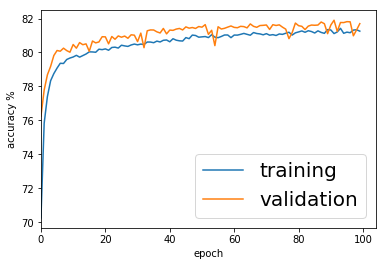

In [231]:
# accuracy plot
plt.plot(100 * np.array(cnn_history['acc']), label='training')
plt.plot(100 * np.array(cnn_history['val_acc']), label='validation')
plt.xlim(0)
plt.xlabel('epoch')
plt.ylabel('accuracy %')
plt.legend(loc='lower right', fontsize=20)
plt.show()

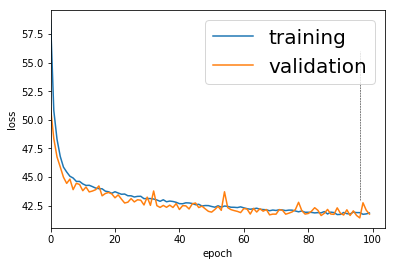

In [232]:
# loss plot
plt.plot(100 * np.array(cnn_history['loss']), label='training')
plt.plot(100 * np.array(cnn_history['val_loss']), label='validation')
plt.xlim(0)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right', fontsize=20)
# the line indicate the epoch corresponding to the best performance on the validation set
plt.vlines(np.argmin(cnn_history['val_loss']), 43, 56, linestyle='dashed', linewidth=0.5)
plt.show()

In [233]:
print 'Loss estimate on unseen examples (from validation set) = {0:.3f}'.format(np.min(cnn_history['val_loss']))

Loss estimate on unseen examples (from validation set) = 0.414


In [293]:
cnn_model.load_weights('models/cnn-model.h5')
yhat_cnn = cnn_model.predict(images_test, batch_size=512)

## Small Locally-Connected Neural Network

In [246]:
from keras.layers import LocallyConnected2D , MaxPool2D, Flatten

In [247]:
x = Input(shape=(images_train.shape[1:]))
h = LocallyConnected2D(32, kernel_size=4, strides=1, activation='relu')(x)
h = Dropout(0.2)(h)
h = MaxPool2D()(h)
h = LocallyConnected2D(8, kernel_size=2, strides=1, activation='relu')(h)
h = Flatten()(h)
h = Dropout(0.2)(h)
y = Dense(1, activation='sigmoid')(h)

In [248]:
lcn_model = Model(x, y)
lcn_model.compile('adam', 'binary_crossentropy', metrics=['acc'])

In [249]:
lcn_model.fit(
    images_train, labels_train,
    epochs=100,
    batch_size=512,
    validation_data=(images_val, labels_val),
    callbacks=[
        EarlyStopping(verbose=True, patience=30, monitor='val_loss'),
        ModelCheckpoint('./models/lcn-model.h5', monitor='val_loss',
                        verbose=True, save_best_only=True)
    ]
)

Train on 96000 samples, validate on 24000 samples
Epoch 1/100
96000/96000 [==============================] - 22s 225us/step - loss: 0.4891 - acc: 0.7703 - val_loss: 0.4580 - val_acc: 0.7929
Epoch 2/100
96000/96000 [==============================] - 18s 191us/step - loss: 0.4469 - acc: 0.7946 - val_loss: 0.4447 - val_acc: 0.7977
Epoch 3/100
96000/96000 [==============================] - 18s 191us/step - loss: 0.4358 - acc: 0.8022 - val_loss: 0.4288 - val_acc: 0.8070
Epoch 4/100
96000/96000 [==============================] - 18s 191us/step - loss: 0.4310 - acc: 0.8039 - val_loss: 0.4249 - val_acc: 0.8092
Epoch 5/100
96000/96000 [==============================] - 18s 190us/step - loss: 0.4230 - acc: 0.8086 - val_loss: 0.4222 - val_acc: 0.8122
Epoch 6/100
96000/96000 [==============================] - 18s 190us/step - loss: 0.4188 - acc: 0.8111 - val_loss: 0.4266 - val_acc: 0.8088
Epoch 7/100
96000/96000 [==============================] - 18s 190us/step - loss: 0.4156 - acc: 0.8125 - val_l

Epoch 31/100
96000/96000 [==============================] - 18s 189us/step - loss: 0.3619 - acc: 0.8412 - val_loss: 0.4366 - val_acc: 0.8093
Epoch 32/100
96000/96000 [==============================] - 18s 189us/step - loss: 0.3600 - acc: 0.8416 - val_loss: 0.4384 - val_acc: 0.8079
Epoch 33/100
96000/96000 [==============================] - 18s 190us/step - loss: 0.3580 - acc: 0.8438 - val_loss: 0.4439 - val_acc: 0.8080
Epoch 34/100
96000/96000 [==============================] - 18s 189us/step - loss: 0.3559 - acc: 0.8441 - val_loss: 0.4445 - val_acc: 0.8033
Epoch 35/100
96000/96000 [==============================] - 18s 189us/step - loss: 0.3549 - acc: 0.8449 - val_loss: 0.4447 - val_acc: 0.8044
Epoch 36/100
96000/96000 [==============================] - 18s 190us/step - loss: 0.3514 - acc: 0.8460 - val_loss: 0.4471 - val_acc: 0.8058
Epoch 37/100
96000/96000 [==============================] - 18s 190us/step - loss: 0.3509 - acc: 0.8464 - val_loss: 0.4502 - val_acc: 0.8022
Epoch 38/100


In [250]:
lcn_history = lcn_model.history.history

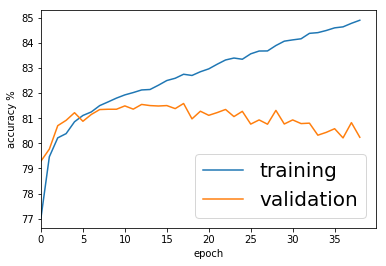

In [251]:
# accuracy plot
plt.plot(100 * np.array(lcn_history['acc']), label='training')
plt.plot(100 * np.array(lcn_history['val_acc']), label='validation')
plt.xlim(0)
plt.xlabel('epoch')
plt.ylabel('accuracy %')
plt.legend(loc='lower right', fontsize=20)
plt.show()

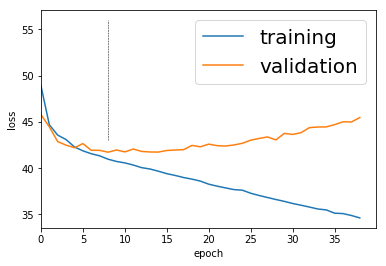

In [252]:
# loss plot
plt.plot(100 * np.array(lcn_history['loss']), label='training')
plt.plot(100 * np.array(lcn_history['val_loss']), label='validation')
plt.xlim(0)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right', fontsize=20)
# the line indicate the epoch corresponding to the best performance on the validation set
plt.vlines(np.argmin(lcn_history['val_loss']), 43, 56, linestyle='dashed', linewidth=0.5)
plt.show()

In [253]:
print 'Loss estimate on unseen examples (from validation set) = {0:.3f}'.format(np.min(lcn_history['val_loss']))

Loss estimate on unseen examples (from validation set) = 0.417


In [292]:
lcn_model.load_weights('models/lcn-model.h5')
yhat_lcn = lcn_model.predict(images_test, batch_size=512)

## Small Fully-Connected network

In [282]:
x = Input(shape=(images_train.shape[1:]))
h = Flatten()(x)
h = Dense(256, activation='relu')(h)
h = Dropout(0.2)(h)
h = Dense(128, activation='relu')(h)
h = Dropout(0.2)(h)
h = Dense(64, activation='relu')(h)
h = Dropout(0.2)(h)
h = Dense(28, activation='relu')(h)
h = Dropout(0.2)(h)
y = Dense(1, activation='sigmoid')(h)

In [283]:
dense_model = Model(x, y)
dense_model.compile('adam', 'binary_crossentropy', metrics=['acc'])

In [284]:
dense_model.fit(
    images_train, labels_train,
    epochs=100,
    batch_size=512,
    validation_data=(images_val, labels_val),
    callbacks=[
        EarlyStopping(verbose=True, patience=30, monitor='val_loss'),
        ModelCheckpoint('./models/dense-model.h5', monitor='val_loss',
                        verbose=True, save_best_only=True)
    ]
)

Train on 96000 samples, validate on 24000 samples
Epoch 1/100
96000/96000 [==============================] - 7s 70us/step - loss: 0.6368 - acc: 0.6912 - val_loss: 0.5074 - val_acc: 0.7636
Epoch 2/100
96000/96000 [==============================] - 3s 33us/step - loss: 0.5155 - acc: 0.7569 - val_loss: 0.4906 - val_acc: 0.7765
Epoch 3/100
96000/96000 [==============================] - 3s 33us/step - loss: 0.4860 - acc: 0.7784 - val_loss: 0.4686 - val_acc: 0.7942
Epoch 4/100
96000/96000 [==============================] - 3s 32us/step - loss: 0.4670 - acc: 0.7890 - val_loss: 0.4547 - val_acc: 0.8003
Epoch 5/100
96000/96000 [==============================] - 3s 32us/step - loss: 0.4523 - acc: 0.7993 - val_loss: 0.4427 - val_acc: 0.8050
Epoch 6/100
96000/96000 [==============================] - 3s 33us/step - loss: 0.4448 - acc: 0.8012 - val_loss: 0.4340 - val_acc: 0.8067
Epoch 7/100
96000/96000 [==============================] - 3s 32us/step - loss: 0.4372 - acc: 0.8060 - val_loss: 0.4336 - 

96000/96000 [==============================] - 3s 31us/step - loss: 0.3517 - acc: 0.8478 - val_loss: 0.4594 - val_acc: 0.8109
Epoch 31/100
96000/96000 [==============================] - 3s 32us/step - loss: 0.3485 - acc: 0.8497 - val_loss: 0.4636 - val_acc: 0.8076
Epoch 32/100
96000/96000 [==============================] - 3s 31us/step - loss: 0.3465 - acc: 0.8500 - val_loss: 0.4616 - val_acc: 0.8106
Epoch 33/100
96000/96000 [==============================] - 3s 31us/step - loss: 0.3448 - acc: 0.8502 - val_loss: 0.4614 - val_acc: 0.8073
Epoch 34/100
96000/96000 [==============================] - 3s 31us/step - loss: 0.3410 - acc: 0.8509 - val_loss: 0.4726 - val_acc: 0.8078
Epoch 35/100
96000/96000 [==============================] - 3s 31us/step - loss: 0.3396 - acc: 0.8528 - val_loss: 0.4705 - val_acc: 0.8066
Epoch 36/100
96000/96000 [==============================] - 3s 31us/step - loss: 0.3364 - acc: 0.8542 - val_loss: 0.4743 - val_acc: 0.8075
Epoch 37/100
96000/96000 [==============

In [285]:
dense_history = dense_model.history.history

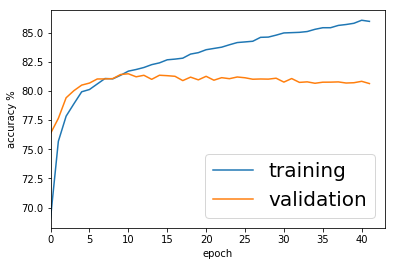

In [286]:
# accuracy plot
plt.plot(100 * np.array(dense_history['acc']), label='training')
plt.plot(100 * np.array(dense_history['val_acc']), label='validation')
plt.xlim(0)
plt.xlabel('epoch')
plt.ylabel('accuracy %')
plt.legend(loc='lower right', fontsize=20)
plt.show()

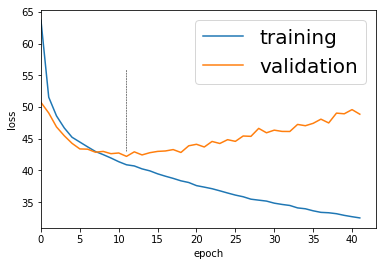

In [287]:
# loss plot
plt.plot(100 * np.array(dense_history['loss']), label='training')
plt.plot(100 * np.array(dense_history['val_loss']), label='validation')
plt.xlim(0)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right', fontsize=20)
# the line indicate the epoch corresponding to the best performance on the validation set
plt.vlines(np.argmin(dense_history['val_loss']), 43, 56, linestyle='dashed', linewidth=0.5)
plt.show()

In [288]:
print 'Loss estimate on unseen examples (from validation set) = {0:.3f}'.format(np.min(dense_history['val_loss']))

Loss estimate on unseen examples (from validation set) = 0.422


In [291]:
dense_model.load_weights('models/dense-model.h5')
yhat_dense = dense_model.predict(images_test, batch_size=512)

## Plot ROC Curves

In [294]:
from sklearn.metrics import roc_curve

In [296]:
fpr_cnn, tpr_cnn, _ = roc_curve(labels_test, yhat_cnn)
fpr_lcn, tpr_lcn, _ = roc_curve(labels_test, yhat_lcn)
fpr_dense, tpr_dense, _ = roc_curve(labels_test, yhat_dense)
fpr_baseline, tpr_baseline, _ = roc_curve(labels_test, yhat_baseline)

/home/ubuntu/venv/micky-work/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in divide
  
/home/ubuntu/venv/micky-work/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ubuntu/venv/micky-work/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in divide
  after removing the cwd from sys.path.
/home/ubuntu/venv/micky-work/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in divide
  """


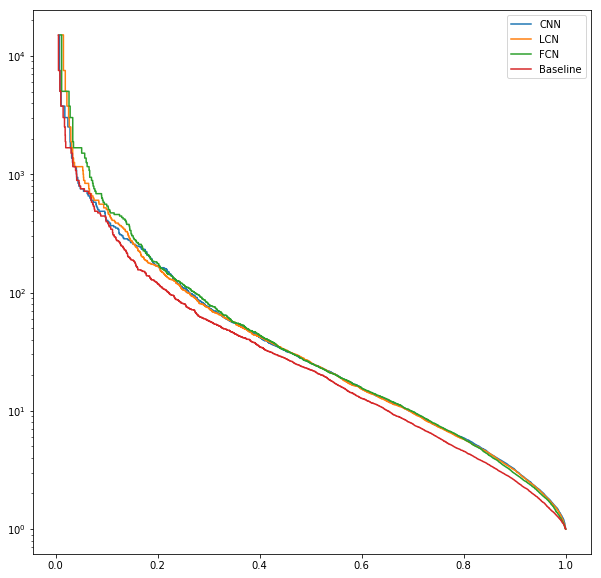

In [301]:
plt.figure(figsize=(10,10))
_ = plt.plot(tpr_cnn, 1./fpr_cnn, label='CNN')
_ = plt.plot(tpr_lcn, 1./fpr_lcn, label='LCN')
_ = plt.plot(tpr_dense, 1./fpr_dense, label='FCN')
_ = plt.plot(tpr_baseline, 1./fpr_baseline, label='Baseline')
plt.legend()
plt.yscale('log')

In [311]:
def get_correlations(images, disc_output):
    '''
    '''
    import pandas as pd
    # -- find the total number of pixels per image, here 25 x 25
    n_pixels = np.prod(images.shape[1:3])
    
    # -- add the pixels as columns to a dataframe
    df = pd.DataFrame({i : np.squeeze(images).reshape(-1, n_pixels)[:, i] for i in range(n_pixels)})
    # -- add a column to the end of the dataframe for the discriminator's output
    df['disc_output'] = disc_output
    # -- pandas offers an easy solution to calculate correlations 
    # (even though it's slow because it also calculates the correlation between each pixel and every other pixel)
    correlations = df.corr().values[:-1, -1]
    return correlations

def plot_correlations(correlations, extent, title='', img_dim=(25, 25), cmap=plt.cm.seismic):

    max_mag = max(
        abs(np.min(correlations[np.isfinite(correlations)])),
        abs(np.max(correlations[np.isfinite(correlations)])),
    ) # highest correlation value (abs value), to make the plot look nice and on a reasonable scale

    f, ax = plt.subplots(figsize=(6, 6))
    im = ax.imshow(
        correlations.reshape(img_dim),
        interpolation='nearest',
        norm=Normalize(vmin=-max_mag, vmax=max_mag),
        extent=extent,
        cmap=cmap
    )
    
    plt.colorbar(im, fraction=0.05, pad=0.05)
    plt.xlabel(r'[Transformed] Pseudorapidity $(\eta)$')
    plt.ylabel(r'[Transformed] Azimuthal Angle $(\phi)$')
    plt.title(title)
#     plt.savefig(os.path.join('..', outdir, outname))

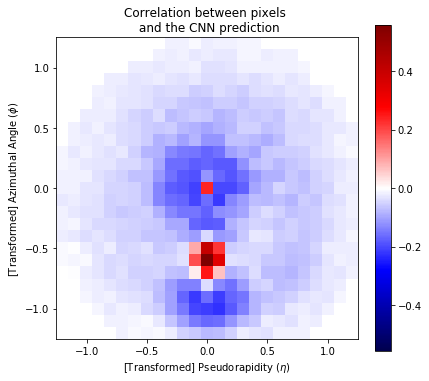

In [316]:
plot_correlations(
    get_correlations(images_test[:10000], yhat_cnn[:10000]),
    extent=[-1.25, 1.25, -1.25, 1.25],
    title='Correlation between pixels \n and the CNN prediction'
)

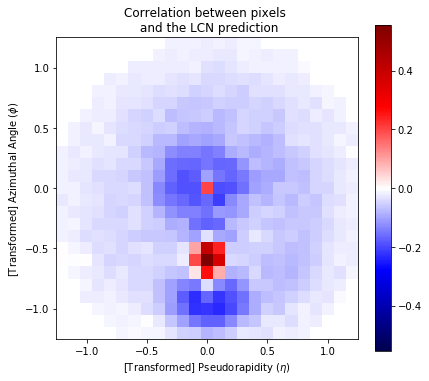

In [317]:
plot_correlations(
    get_correlations(images_test[:10000], yhat_lcn[:10000]),
    extent=[-1.25, 1.25, -1.25, 1.25],
    title='Correlation between pixels \n and the LCN prediction'
)

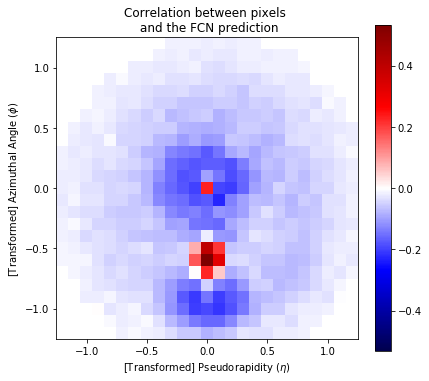

In [318]:
plot_correlations(
    get_correlations(images_test[:10000], yhat_dense[:10000]),
    extent=[-1.25, 1.25, -1.25, 1.25],
    title='Correlation between pixels \n and the FCN prediction'
)

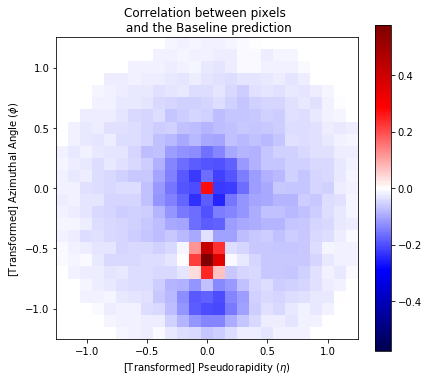

In [320]:
plot_correlations(
    get_correlations(images_test[:10000], yhat_baseline[:10000]),
    extent=[-1.25, 1.25, -1.25, 1.25],
    title='Correlation between pixels \n and the Baseline prediction'
)

In [323]:
def plot_output_vs_kin(kin, output, xlabel, ylabel, nbins=30):
    '''
    Plot one output of the discriminator network vs. one of the 1D physics variables that describe jets
    Args:
    -----
        kin : numpy array, kinematic property (such as mass or pT) associated with each image. I.e.: discrete_mass(np.squeeze(generated_images))
        output : numpy array, one of the 2 outputs of the discriminator, evaluated on the same images that `kin` refers to
        xlabel : string, x-axis label that describes the meaning of `kin`
        ylabel : string, y-axis label that describes the meaning og `output`
        outname : name of the output file, to be placed in ../plots/
        nbins : (default = 30) number of bins to use to represent the distributions in a discretized way
    
    '''
    # set the colormap
    plt.set_cmap('jet')
    # draw a 2d histogram of the discriminator's output versus the kinematic variable of choice (mass, pT, etc.)
    h, binx, biny, _ = plt.hist2d(kin, output.reshape(-1,), bins=nbins)
    plt.clf() # we don't want to plot this 2D histogram, we want to normalize it per bin first
    
    # normalize the histogram such that the entries in each column add up to 1, such that the intensity
    # of each corresponds to the percentage of the jets in a given mass (or pT) bin that get assigned a p
    for i in range(nbins):
        h[i, :] = h[i, :] / float(np.sum(h[i, :]))
    # plot the normalized histogram as an image
    f, ax2 = plt.subplots(figsize=(6, 6))
    im = ax2.imshow(
        np.flipud(h.T), 
        interpolation='nearest',
        norm=LogNorm(),
        extent=[binx.min(), binx.max(), biny.min(), biny.max()],
        aspect="auto"
    )
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # add a custom colorbar
    cax = f.add_axes([0.93, 0.1, 0.03, 0.8])
    plt.colorbar(im, cax = cax)

### Mass

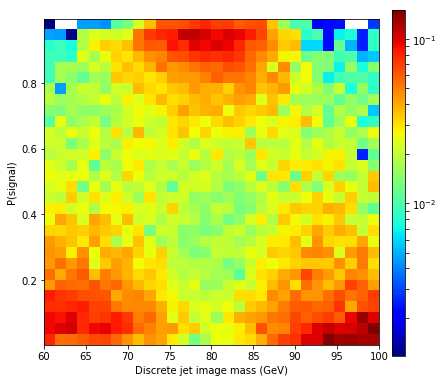

In [328]:
plot_output_vs_kin(
    scaler.inverse_transform(features_test)[:, 0], # mass
    yhat_cnn,
    xlabel='Discrete jet image mass (GeV)',
    ylabel='P(signal)',
)

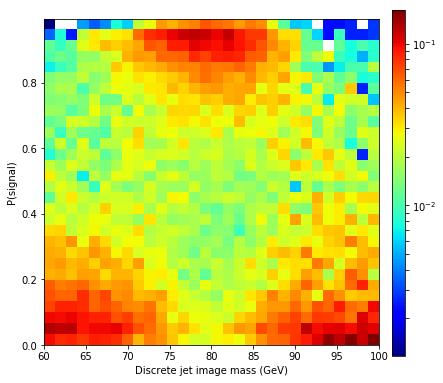

In [329]:
plot_output_vs_kin(
    scaler.inverse_transform(features_test)[:, 0], # mass
    yhat_lcn,
    xlabel='Discrete jet image mass (GeV)',
    ylabel='P(signal)',
)

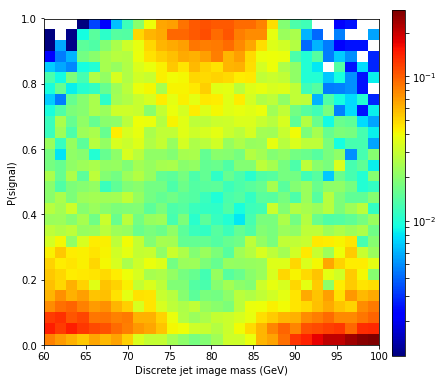

In [330]:
plot_output_vs_kin(
    scaler.inverse_transform(features_test)[:, 0], # mass
    yhat_dense,
    xlabel='Discrete jet image mass (GeV)',
    ylabel='P(signal)',
)

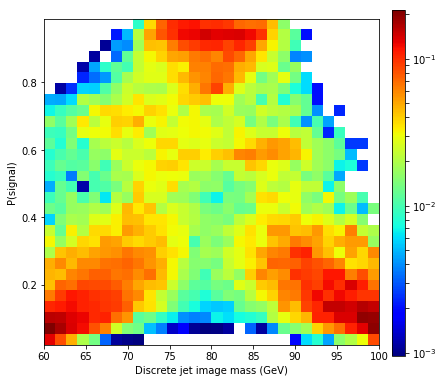

In [331]:
plot_output_vs_kin(
    scaler.inverse_transform(features_test)[:, 0], # mass
    yhat_baseline,
    xlabel='Discrete jet image mass (GeV)',
    ylabel='P(signal)',
)

### Tau_21

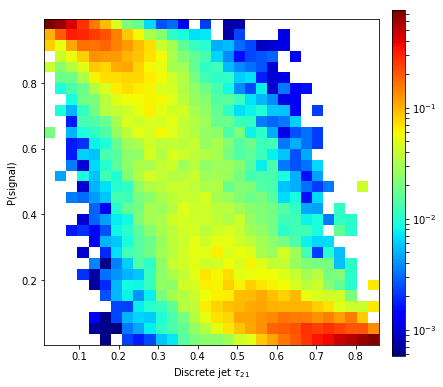

In [332]:
plot_output_vs_kin(
    scaler.inverse_transform(features_test)[:, 1], # tau21
    yhat_cnn,
    xlabel=r'Discrete jet $\tau_{21}$',
    ylabel='P(signal)',
)

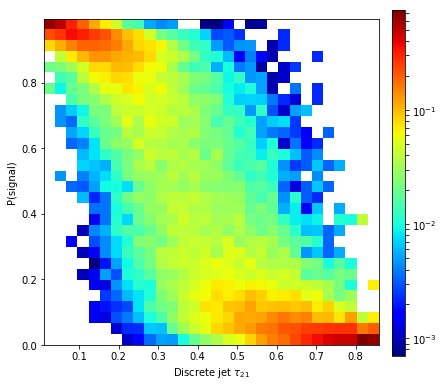

In [333]:
plot_output_vs_kin(
    scaler.inverse_transform(features_test)[:, 1], # tau21
    yhat_lcn,
    xlabel=r'Discrete jet $\tau_{21}$',
    ylabel='P(signal)',
)

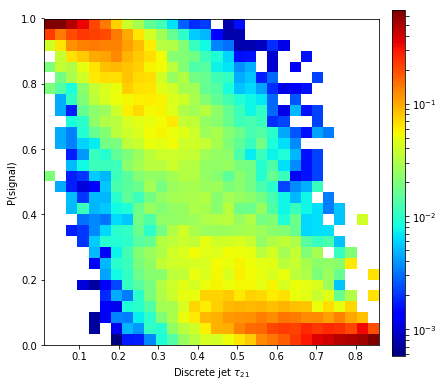

In [334]:
plot_output_vs_kin(
    scaler.inverse_transform(features_test)[:, 1], # tau21
    yhat_dense,
    xlabel=r'Discrete jet $\tau_{21}$',
    ylabel='P(signal)',
)

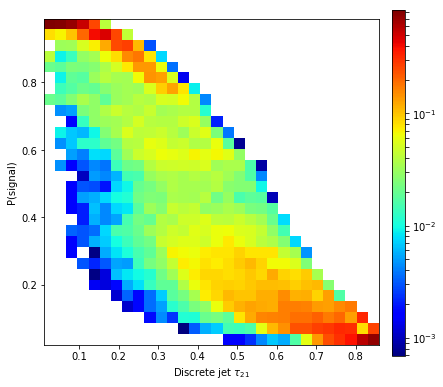

In [335]:
plot_output_vs_kin(
    scaler.inverse_transform(features_test)[:, 1], # tau21
    yhat_baseline,
    xlabel=r'Discrete jet $\tau_{21}$',
    ylabel='P(signal)',
)

### Delta R

/home/ubuntu/venv/micky-work/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in divide


/home/ubuntu/venv/micky-work/local/lib/python2.7/site-packages/matplotlib/colors.py:1012: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


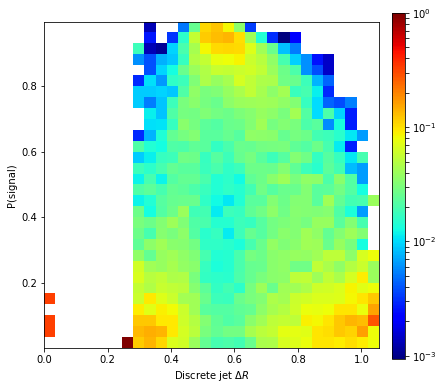

In [336]:
plot_output_vs_kin(
    scaler.inverse_transform(features_test)[:, 2], # deltaR
    yhat_cnn,
    xlabel=r'Discrete jet $\Delta R$',
    ylabel='P(signal)',
)

/home/ubuntu/venv/micky-work/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in divide


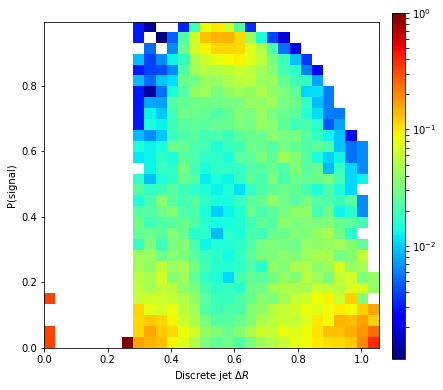

In [337]:
plot_output_vs_kin(
    scaler.inverse_transform(features_test)[:, 2], # deltaR
    yhat_lcn,
    xlabel=r'Discrete jet $\Delta R$',
    ylabel='P(signal)',
)

/home/ubuntu/venv/micky-work/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in divide


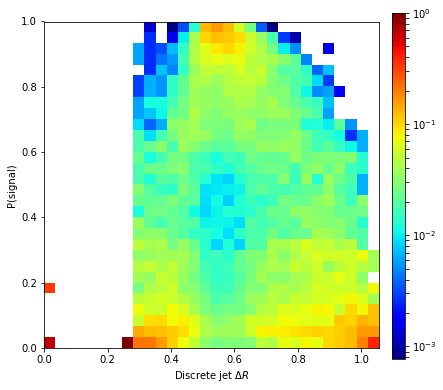

In [338]:
plot_output_vs_kin(
    scaler.inverse_transform(features_test)[:, 2], # deltaR
    yhat_dense,
    xlabel=r'Discrete jet $\Delta R$',
    ylabel='P(signal)',
)

/home/ubuntu/venv/micky-work/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in divide


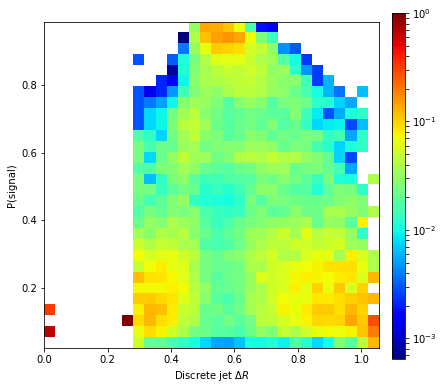

In [339]:
plot_output_vs_kin(
    scaler.inverse_transform(features_test)[:, 2], # deltaR
    yhat_baseline,
    xlabel=r'Discrete jet $\Delta R$',
    ylabel='P(signal)',
)

# Learn a decorrelated classifier

In [419]:
x = Input(shape=(images_train.shape[1:]))
h = Flatten()(x)
h = Dense(256, activation='relu')(h)
h = Dropout(0.2)(h)
h = Dense(128, activation='relu')(h)
h = Dropout(0.2)(h)
h = Dense(64, activation='relu')(h)
h = Dropout(0.2)(h)
h = Dense(28, activation='relu')(h)
h = Dropout(0.2)(h)
y = Dense(1, activation='sigmoid')(h)

x2 = Input(shape=(1, ))
h2 = Dense(10, activation='relu')(x2)
y2 = Dense(1)(h2)

In [420]:
decorr_model = Model(x, y)
decorr_model.compile('adam', 'binary_crossentropy', metrics=['acc'])

adv_model = Model(x2, y2)
adv_model.compile('adam', 'mse')

In [421]:
from keras.losses import mse

In [422]:
def inv_mse(*args, **kwargs):
    return -0.6 * mse(*args, **kwargs)

**N.B.** -- this is a very simplistic and not-so-subtle way of encouraging this. Ideally, the classifier wants the adversary to be maximally confused (i.e., no mutual information) not maximally wrong. We're going to do the naive thing here, but [this](https://github.com/glouppe/paper-learning-to-pivot/blob/master/code/Toy.ipynb) is the form that is best suited to doing this decorrelation in probabilistically correct way!

In [423]:
adv_model.trainable = False

In [424]:
combined_model = Model(x, [y, adv_model(y)])
combined_model.compile('adam', ['binary_crossentropy', inv_mse])

In [425]:
decorr_model.fit(
    images_train, labels_train,
    epochs=1,
    batch_size=512,
#     validation_data=(images_val, labels_val),
#     callbacks=[
#         EarlyStopping(verbose=True, patience=30, monitor='val_loss'),
#         ModelCheckpoint('./models/dense-model.h5', monitor='val_loss',
#                         verbose=True, save_best_only=True)
#     ]
)

Epoch 1/1
96000/96000 [==============================] - 5s 55us/step - loss: 0.5888 - acc: 0.7078


In [426]:
for _ in range(10):
    adv_model.fit(
        decorr_model.predict(images_train), features_train[:, 0], # mass
        epochs=5,
        batch_size=512
    )
    combined_model.fit(
        images_train, [labels_train, features_train[:, 0]], # mass
        epochs=1,
        batch_size=512
    )

Epoch 1/5
96000/96000 [==============================] - 3s 29us/step - loss: 0.9884
Epoch 2/5
96000/96000 [==============================] - 0s 5us/step - loss: 0.9841
Epoch 3/5
96000/96000 [==============================] - 0s 5us/step - loss: 0.9826
Epoch 4/5
96000/96000 [==============================] - 0s 5us/step - loss: 0.9820
Epoch 5/5
96000/96000 [==============================] - 0s 4us/step - loss: 0.9817
Epoch 1/1
96000/96000 [==============================] - 5s 55us/step - loss: -0.1039 - dense_140_loss: 0.5129 - model_52_loss: -0.6168
Epoch 1/5
96000/96000 [==============================] - 0s 5us/step - loss: 0.9987
Epoch 2/5
96000/96000 [==============================] - 0s 5us/step - loss: 0.9852
Epoch 3/5
96000/96000 [==============================] - 0s 5us/step - loss: 0.9833
Epoch 4/5
96000/96000 [==============================] - 0s 5us/step - loss: 0.9821
Epoch 5/5
96000/96000 [==============================] - 0s 4us/step - loss: 0.9811
Epoch 1/1
96000/96000 [

In [427]:
yhat_decorr = decorr_model.predict(images_test)

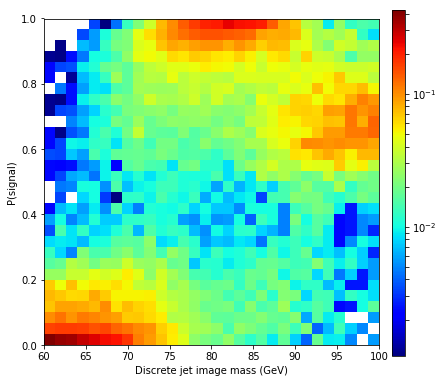

In [428]:
plot_output_vs_kin(
    scaler.inverse_transform(features_test)[:, 0], # mass
    yhat_decorr,
    xlabel='Discrete jet image mass (GeV)',
    ylabel='P(signal)',
)

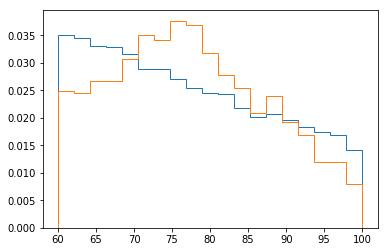

In [418]:
_ = plt.hist(scaler.inverse_transform(features_test)[labels_test==0, 0],
            bins =np.linspace(60, 100, 20), histtype='step', normed=True)
_ = plt.hist(scaler.inverse_transform(features_test)[np.logical_and(labels_test==0, yhat_cnn.ravel()>0.5), 0],
            bins=np.linspace(60, 100, 20), histtype='step', normed=True)

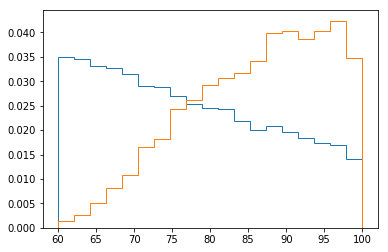

In [429]:
_ = plt.hist(scaler.inverse_transform(features_test)[labels_test==0, 0],
            bins =np.linspace(60, 100, 20), histtype='step', normed=True)
_ = plt.hist(scaler.inverse_transform(features_test)[np.logical_and(labels_test==0, yhat_decorr.ravel()>0.5), 0],
            bins=np.linspace(60, 100, 20), histtype='step', normed=True)